In [7]:
from wyvern.performance.takeoff import prop_thrust, ground_roll_sweep, takeoff_distance
from wyvern.data.propellers import PROP_10X5, PROP_8X8, PROP_9X6
from wyvern.performance.models import QuadraticLDModel
import numpy as np

# parmeters
mass = 1.627 # kg
v_max = 9.0 # m/s
aero_model = QuadraticLDModel(c_d0=0.0320, e_inviscid=0.95, K=0.45, aspect_ratio=5.106)
mu = 0.1    # ground friction coefficient
CLgr = 0.1 # corresponds to roughly 2 degrees of AoA
thrust_model = prop_thrust(PROP_9X6)

def vs_from_v_hw(v_hw: float) -> tuple[np.ndarray, np.ndarray]:
    # calculate takeoff distance
    v_series, s_series = ground_roll_sweep(v_hw=v_hw, v_max=v_max, mass=mass, mu=mu, CLgr=CLgr, thrust_model=thrust_model, aero_model=aero_model)
    s_to = takeoff_distance(v_hw=v_hw, v_lo=8.05, mass=mass, mu=mu, CLgr=CLgr, thrust_model=thrust_model, aero_model=aero_model)
    print(f'Takeoff distance: {s_to:.2f} m = {s_to*3.281:.2f} ft')
    return v_series, s_series

In [8]:
# compute v and s series
v_hw_vals = [0, 1, 2, 3]
v_series, s_series = zip(*[vs_from_v_hw(v) for v in v_hw_vals])

Takeoff distance: 8.94 m = 29.32 ft
Takeoff distance: 6.95 m = 22.80 ft
Takeoff distance: 5.20 m = 17.06 ft
Takeoff distance: 3.69 m = 12.09 ft


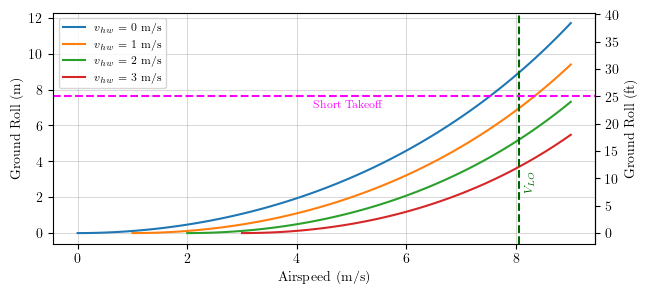

In [14]:
from matplotlib import pyplot as plt
from matplotlib import rcParams

rcParams["text.usetex"] = True
# use computer modern serif font for all text
rcParams["font.family"] = "serif"
# plt.style.use("dark_background")

plt.figure(figsize=(7,3))

for i, v_hw in enumerate(v_hw_vals):
    plt.plot(v_series[i], s_series[i], label="$v_{hw}$" + f" = {v_hw} m/s")
plt.axvline(8.05, color="darkgreen", linestyle="--", label="_")
plt.text(8.15, 2.2, "$V_{LO}$", fontsize=8, color="darkgreen", ha="left", va="bottom", rotation=90)
plt.axhline(7.62, color="magenta", linestyle="--", label="_")
plt.text(4.3, 7.42, "Short Takeoff", fontsize=8, color="magenta", ha="left", va="top")
ax_ft = plt.gca().secondary_yaxis('right', functions=(lambda x: x*3.281, lambda x: x/3.281))
ax_ft.set_ylabel("Ground Roll (ft)")
ax_ft.set_yticks(np.arange(0, 45, 5))
plt.xlabel("Airspeed (m/s)")
plt.ylabel("Ground Roll (m)")
plt.grid(linewidth=0.5, alpha=0.7)
# plt.title("Takeoff Performance")
plt.legend(fontsize=8)
plt.savefig("takeoff_distance.pdf", bbox_inches="tight")  

